In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
df = pd.read_csv("/content/drive/MyDrive/practical_ds/Hospital_inpatient_discharge.csv")

In [ ]:
df.shape

(200149, 34)



*   The Dataset consists almost 200k records and 34 features



In [ ]:
df.head(100)

,Hospital Service Area,Hospital County,Operating Certificate Number,Permanent Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,NaN,M,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Medicare,Self-Pay,NaN,N,N,114168.00,40464.04
1,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,M,White,Spanish/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,58517.00,26046.50
2,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,30 to 49,105,F,White,Unknown,...,Moderate,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,39647.04,17397.59
3,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,50 to 69,105,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicaid,Medicaid,Self-Pay,NaN,N,N,36031.09,16118.84
4,Hudson Valley,Westchester,5903001.0,1061.0,Montefiore Mount Vernon Hospital,18 to 29,105,F,White,Spanish/Hispanic,...,Minor,Medical,Department of Corrections,Self-Pay,NaN,NaN,N,N,30534.00,11921.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Hudson Valley,Sullivan,5263000.0,971.0,Catskill Regional Medical Center,30 to 49,127,F,White,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,NaN,N,N,11182.38,4122.02
96,Hudson Valley,Sullivan,5263000.0,971.0,Catskill Regional Medical Center,0 to 17,127,F,White,Not Span/Hispanic,...,Minor,Medical,Medicaid,NaN,NaN,3800.0,N,N,5243.70,1662.69
97,Hudson Valley,Sullivan,5263000.0,971.0,Catskill Regional Medical Center,30 to 49,127,F,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,NaN,N,Y,7843.56,1927.71
98,Hudson Valley,Sullivan,5263000.0,971.0,Catskill Regional Medical Center,50 to 69,127,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,NaN,N,Y,13414.96,3870.16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200149 entries, 0 to 200148
Data columns (total 34 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                199691 non-null  object 
 1   Hospital County                      199691 non-null  object 
 2   Operating Certificate Number         199691 non-null  float64
 3   Permanent Facility Id                199691 non-null  float64
 4   Facility Name                        200149 non-null  object 
 5   Age Group                            200149 non-null  object 
 6   Zip Code - 3 digits                  196785 non-null  object 
 7   Gender                               200149 non-null  object 
 8   Race                                 200149 non-null  object 
 9   Ethnicity                            200149 non-null  object 
 10  Length of Stay                       200149 non-null  object 
 11  Type of Admis



*   The dataframe has some columns that consist null values.
*   The data type of length of stay is object which needs to be converted in the integer format.



In [ ]:
# checking unique values of length of stay
# print(df['Length of Stay'].unique())
# df.loc[df['Length of Stay'] == '120 +', 'Length of Stay'] = '120'
# df['Length of Stay'] = df['Length of Stay'].astype(int)
# print(df['Length of Stay'].unique())
df['Length of Stay'] = df['Length of Stay'].replace('120 +', '120').astype(int)
print(df['Length of Stay'].unique())

[ 21   8   6   4   3   1  27  14   5   2  26  24  25  20  12  11   7   9
  13  10  62  60  42  36  29  28  15  16  17  44  22  64  37  19  78  65
  39  35 118  68  49  30  34  18  50  56  61  41  45  51  47  31  23  80
  52  38  32 113 120  71  66  48  96  54  43  91  67  46  90  33  57  74
  88  81  83  75  55 107  77  72  70  59 103 110  76  40 101  73  69  53
  58  98  63 106  84  85  79 108  97  92 102  99 109  94 117 105 114 104
  82 112 100 116  86 119  95  87  89  93 111]


In [ ]:
df[['Permanent Facility Id', 'Length of Stay', 'Discharge Year', 'Birth Weight', 'Total Charges', 'Total Costs']].describe().round(2)

,Permanent Facility Id,Length of Stay,Discharge Year,Birth Weight,Total Charges,Total Costs
count,199691.00,200149.00,200149.0,19045.00,200149.00,200149.00
mean,1114.66,5.60,2017.0,3199.76,50220.57,17098.14
std,741.01,8.16,0.0,597.13,94103.74,50755.86
min,1.00,1.00,2017.0,100.00,0.01,0.00
25%,636.00,2.00,2017.0,2900.00,14175.76,4973.94
50%,1169.00,3.00,2017.0,3200.00,27468.09,9239.08
75%,1456.00,6.00,2017.0,3600.00,54172.02,17639.28
max,9431.00,120.00,2017.0,9000.00,8626658.08,8868612.79


*   The column LoS is right skewed since the mean is 5.60 which is greater than 50% of the data and it's affected by the outliers.
*   All the data are from the year of 2017.
*   The column birth weight is normally distributed but it consists lots of null values.
*   Both the total charges and total cost are right skewed.



In [ ]:
# Analysis of categorical columns
df.describe(include='object')

,Hospital Service Area,Hospital County,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,Type of Admission,Patient Disposition,...,APR DRG Description,APR MDC Description,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Abortion Edit Indicator,Emergency Department Indicator
count,199691,199691,200149,200149,196785,200149,200149,200149,200149,200149,...,200149,200149,200126,200126,200149,200149,134491,62622,200149,200149
unique,8,51,164,5,50,3,4,4,6,19,...,320,26,4,4,2,10,10,10,2,2
top,New York City,Manhattan,Mount Sinai Hospital,70 or Older,112,F,White,Not Span/Hispanic,Emergency,Home or Self Care,...,"Neonate birthwt >2499g, normal newborn or neon...",Diseases and Disorders of the Circulatory System,Moderate,Minor,Medical,Medicare,Medicaid,Self-Pay,N,Y
freq,109323,47614,9708,56724,32775,112226,105789,164073,128339,130247,...,15808,25808,77293,113307,151172,77476,48925,45099,199839,116351




*   More than half of the hospitals are located in New York city area and Mount Sinai Hospital is the most popular hospital among 164 distinct hospital companies.
*   Older people over the age of 70 and Female patients are more likely to get admitted in the hospitals.
*   The emergency conditioned patiesnt are more than half of all the admissions.
*   After getting discharged most of the patients do require only home or self care.
*   Liveborn is the top frequent case among 262 different cases.





*   Birth weight column consists around 90% null values



In [ ]:
# checking the null values for each column
df.isnull().sum()

,0
Hospital Service Area,458
Hospital County,458
Operating Certificate Number,458
Permanent Facility Id,458
Facility Name,0
Age Group,0
Zip Code - 3 digits,3364
Gender,0
Race,0
Ethnicity,0


In [ ]:
df1 = df.copy()
# Columns to drop (including textual descriptions and irrelevant ones)
columns_to_drop = [
    'Hospital Service Area', 'Permanent Facility Id', 'Operating Certificate Number', 'Facility Name',
    'Zip Code - 3 digits', 'Discharge Year', 'CCS Diagnosis Description', 'CCS Procedure Description',
    'APR DRG Description', 'APR MDC Description', 'APR Severity of Illness Description',
    'APR Medical Surgical Description', 'Payment Typology 2', 'Payment Typology 3',
    'Birth Weight', 'Abortion Edit Indicator'
    ]

df1.drop(columns=columns_to_drop, inplace=True)

print("Remaining columns:", df1.columns.tolist())

Remaining columns: ['Hospital County', 'Age Group', 'Gender', 'Race', 'Ethnicity', 'Length of Stay', 'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code', 'APR Severity of Illness Code', 'APR Risk of Mortality', 'Payment Typology 1', 'Emergency Department Indicator', 'Total Charges', 'Total Costs']


In [ ]:
# Handling missing values safely without inplace=True
df1['Hospital County'] = df1['Hospital County'].fillna('Unknown')
df1['APR Risk of Mortality'] = df1['APR Risk of Mortality'].fillna('Unknown')

In [ ]:
df1.isnull().sum()

,0
Hospital County,0
Age Group,0
Gender,0
Race,0
Ethnicity,0
Length of Stay,0
Type of Admission,0
Patient Disposition,0
CCS Diagnosis Code,0
CCS Procedure Code,0


In [ ]:
df1.nunique()

,0
Hospital County,52
Age Group,5
Gender,3
Race,4
Ethnicity,4
Length of Stay,119
Type of Admission,6
Patient Disposition,19
CCS Diagnosis Code,262
CCS Procedure Code,220




*   Some of the categorical columns (CCS Diagnosis Code, CCS Procedure Code, APR DRG Code) have higher cardinality.



In [ ]:
for col in df1[['CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code']].columns:
    print("Unique values in", col, "more than 1000 frequency:")
    print(df1[col].value_counts()[df1[col].value_counts() > 1000].count())
    print("*" * 50)

Unique values in CCS Diagnosis Code more than 1000 frequency:
52
**************************************************
Unique values in CCS Procedure Code more than 1000 frequency:
31
**************************************************
Unique values in APR DRG Code more than 1000 frequency:
53
**************************************************
Unique values in APR MDC Code more than 1000 frequency:
20
**************************************************


In [ ]:
# Function to group rare categories into 0
def group_rare_categories(df, column, threshold):
    category_counts = df[column].value_counts()
    rare_categories = category_counts[category_counts < threshold].index
    df[column] = df[column].replace(rare_categories, 0)
    return df
# Apply grouping to selected columns
columns_to_group = ['CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code']

for col in columns_to_group:
    df1 = group_rare_categories(df1, col, 1000)

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, color, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 10))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        color=color,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def distribution_plot_wrt_target(data, predictor, target, box_color="lightblue"):
    """
    Plots the distribution of a predictor variable with respect to a continuous target.
    """

    # Scatter Plot
    sns.scatterplot(data=data, x=predictor, y=target, color="darkorange", alpha=0.7)
    # Adjust layout and show
    plt.tight_layout()
    plt.show()

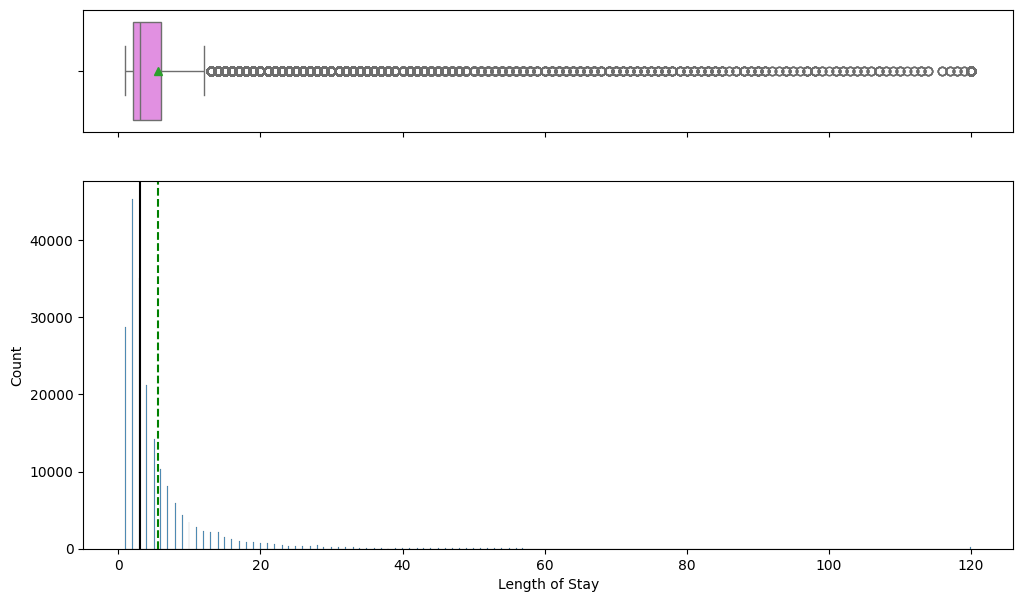

In [ ]:
histogram_boxplot(df1, 'Length of Stay')

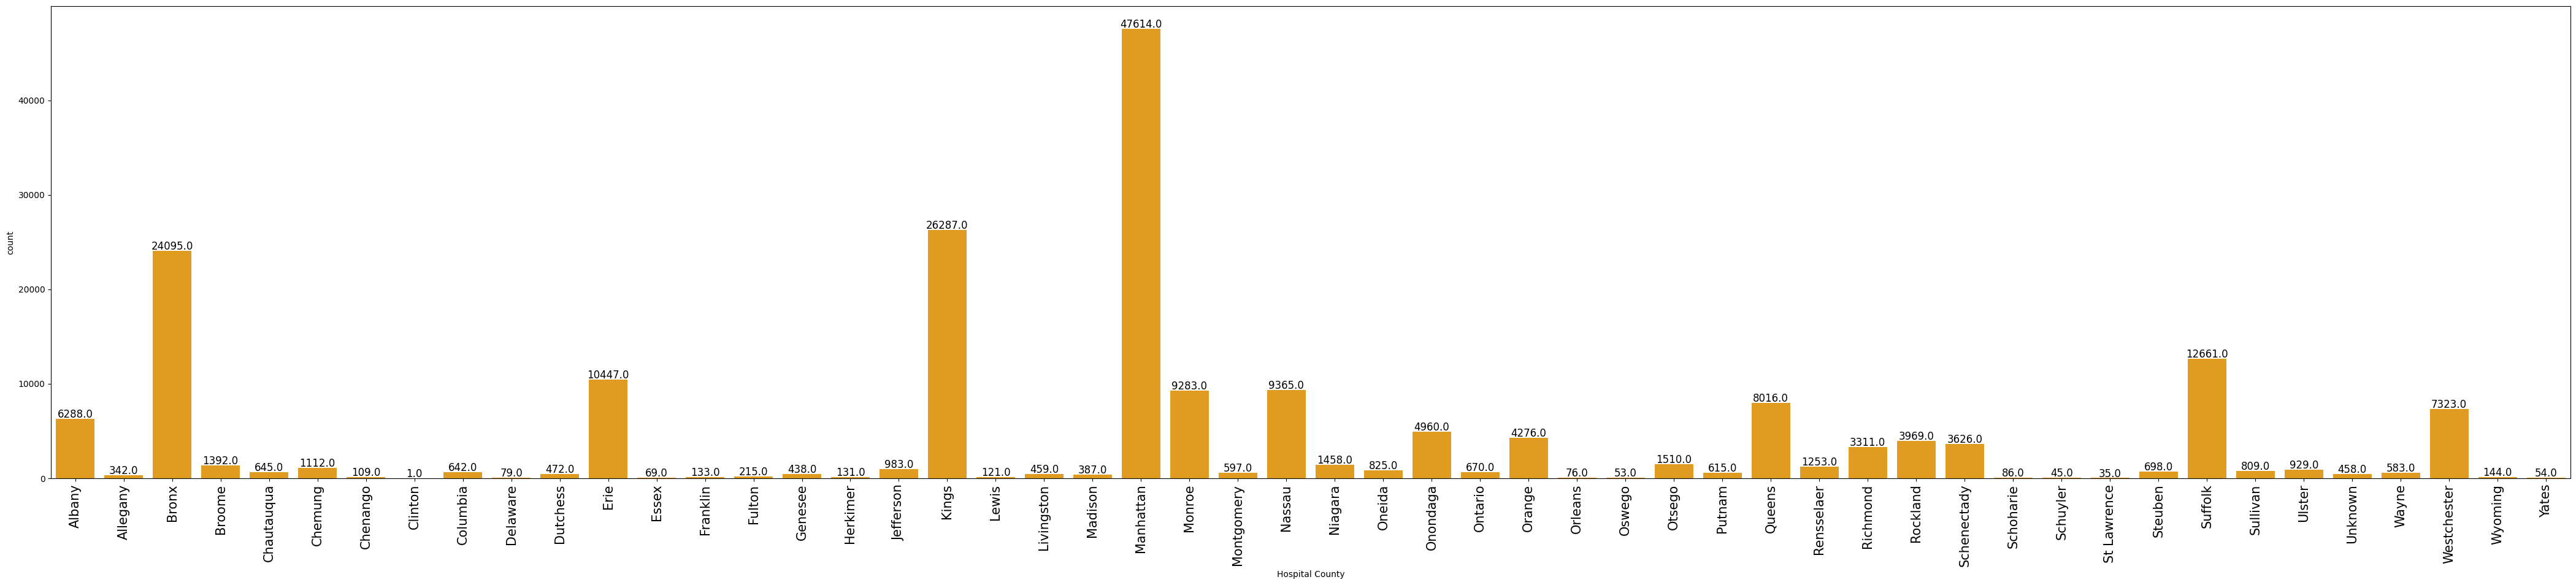

In [ ]:
labeled_barplot(df1, 'Hospital County', 'Orange')

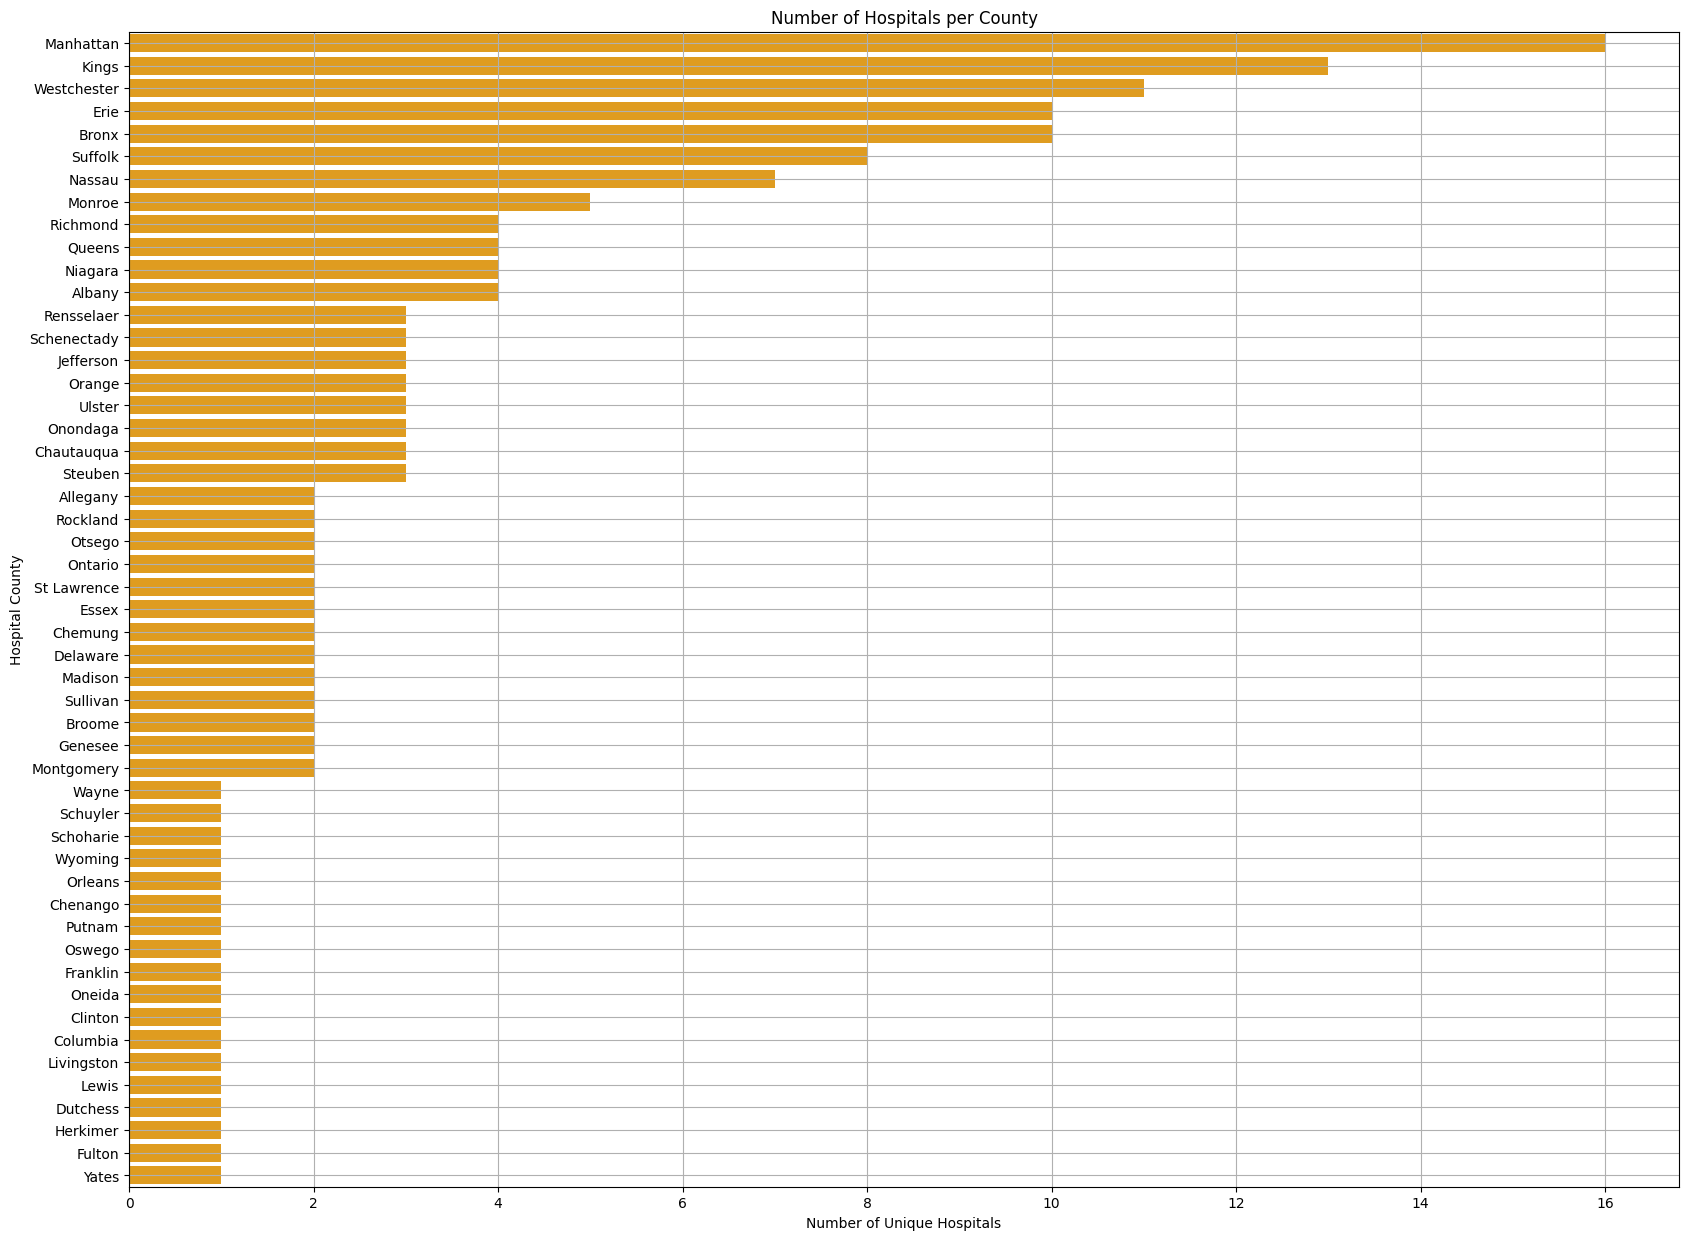

In [ ]:
# Number of unique hospitals per county
hospital_counts = df.groupby('Hospital County')['Permanent Facility Id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(20,15))
sns.barplot(x=hospital_counts.values, y=hospital_counts.index, color='Orange')
plt.title('Number of Hospitals per County')
plt.xlabel('Number of Unique Hospitals')
plt.ylabel('Hospital County')
plt.grid(True)
plt.show()

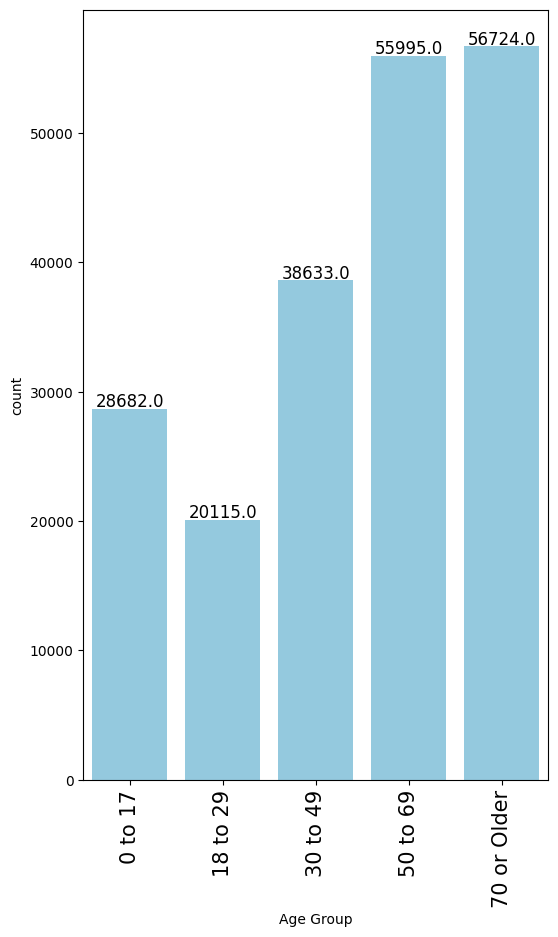

In [ ]:
labeled_barplot(df1, 'Age Group', 'SkyBlue')

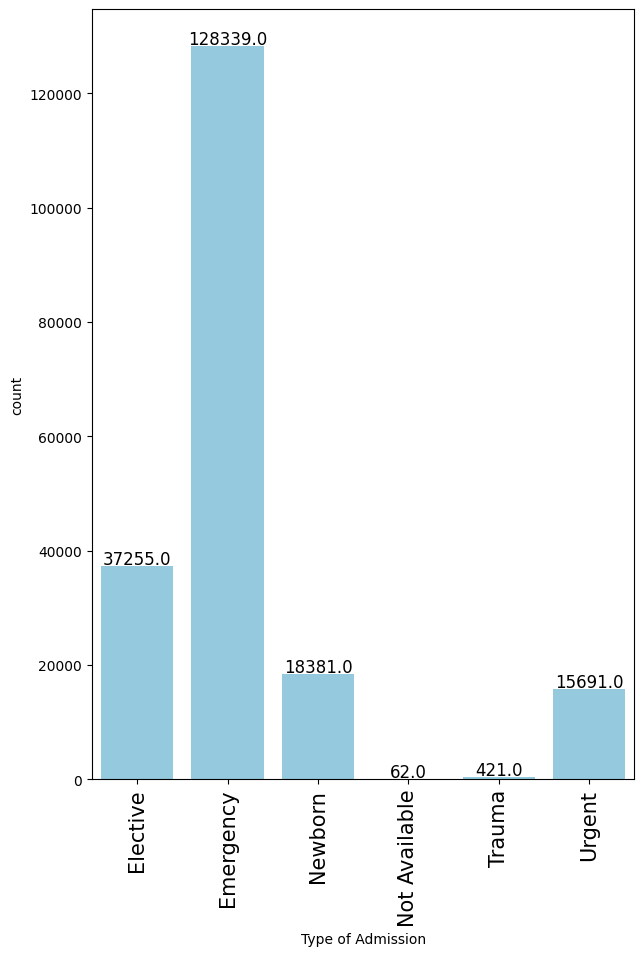

In [ ]:
labeled_barplot(df1, 'Type of Admission', 'SkyBlue')

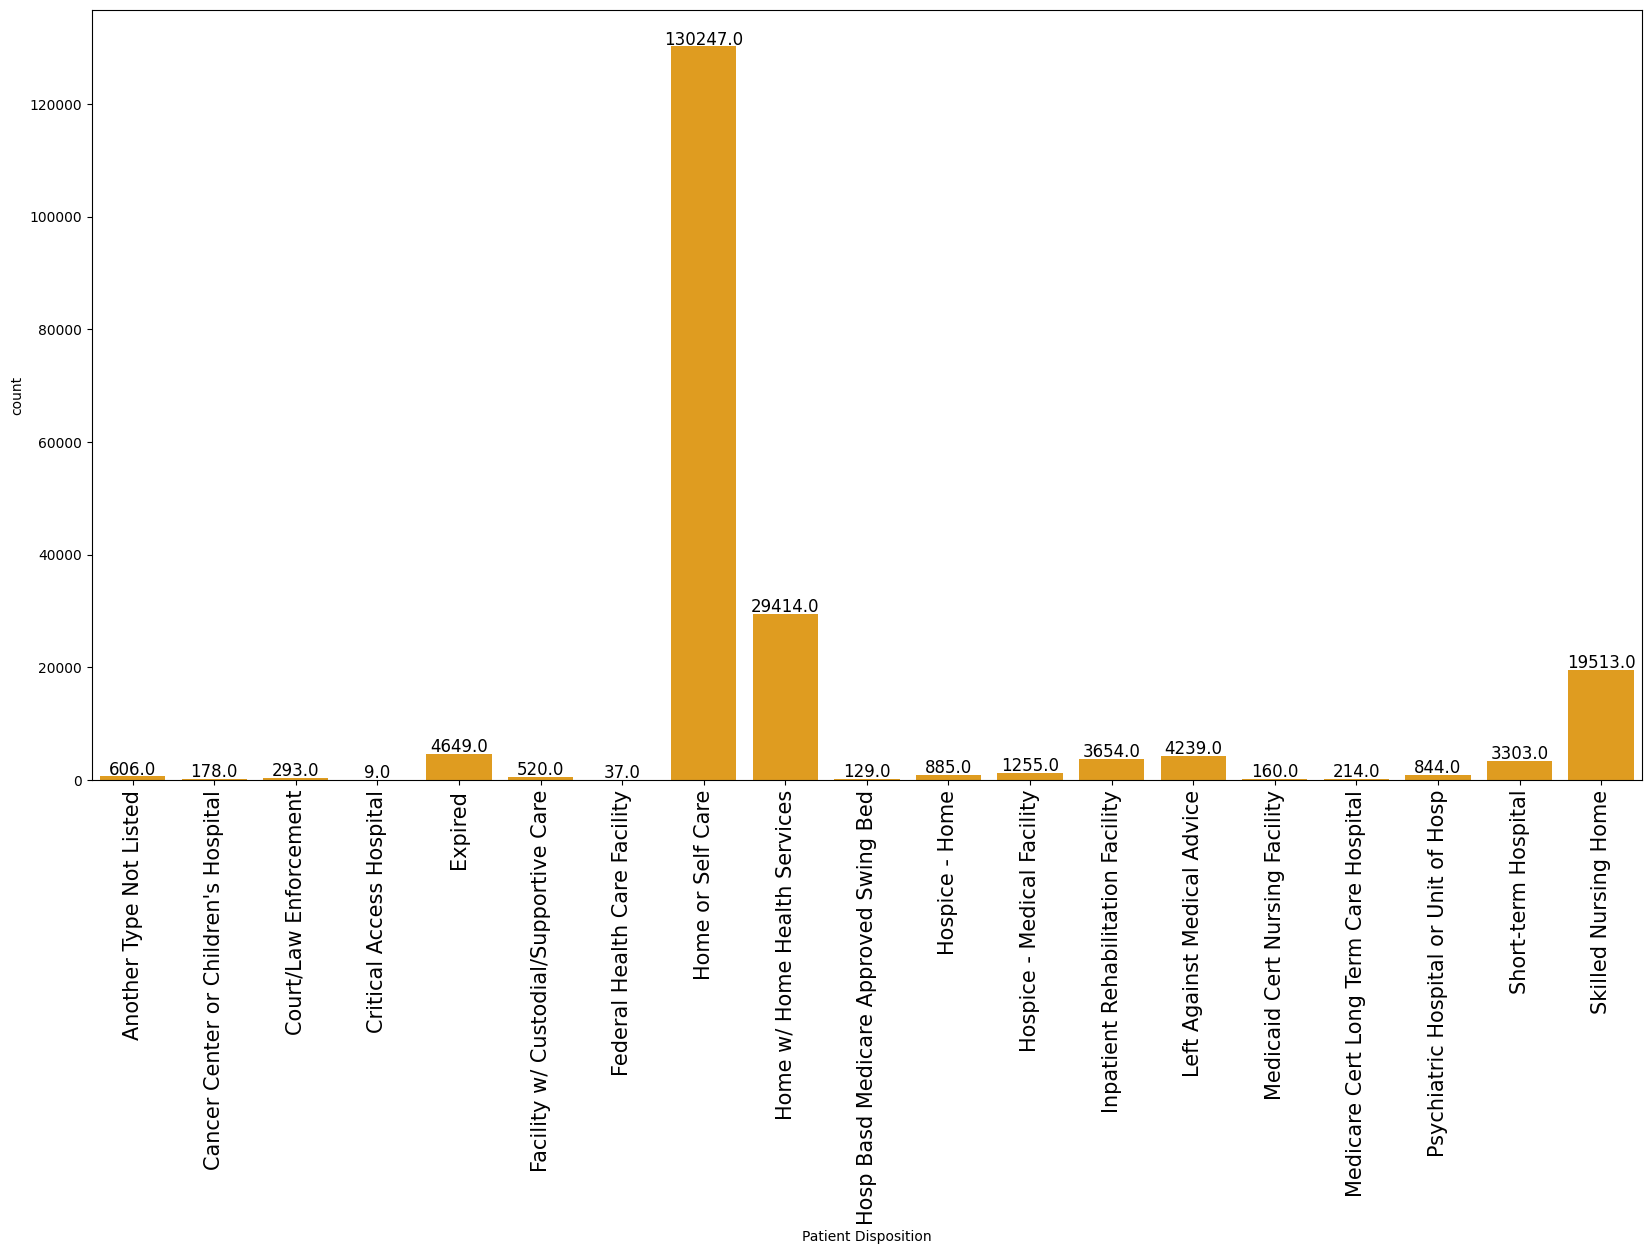

In [ ]:
labeled_barplot(df1, 'Patient Disposition', 'Orange')

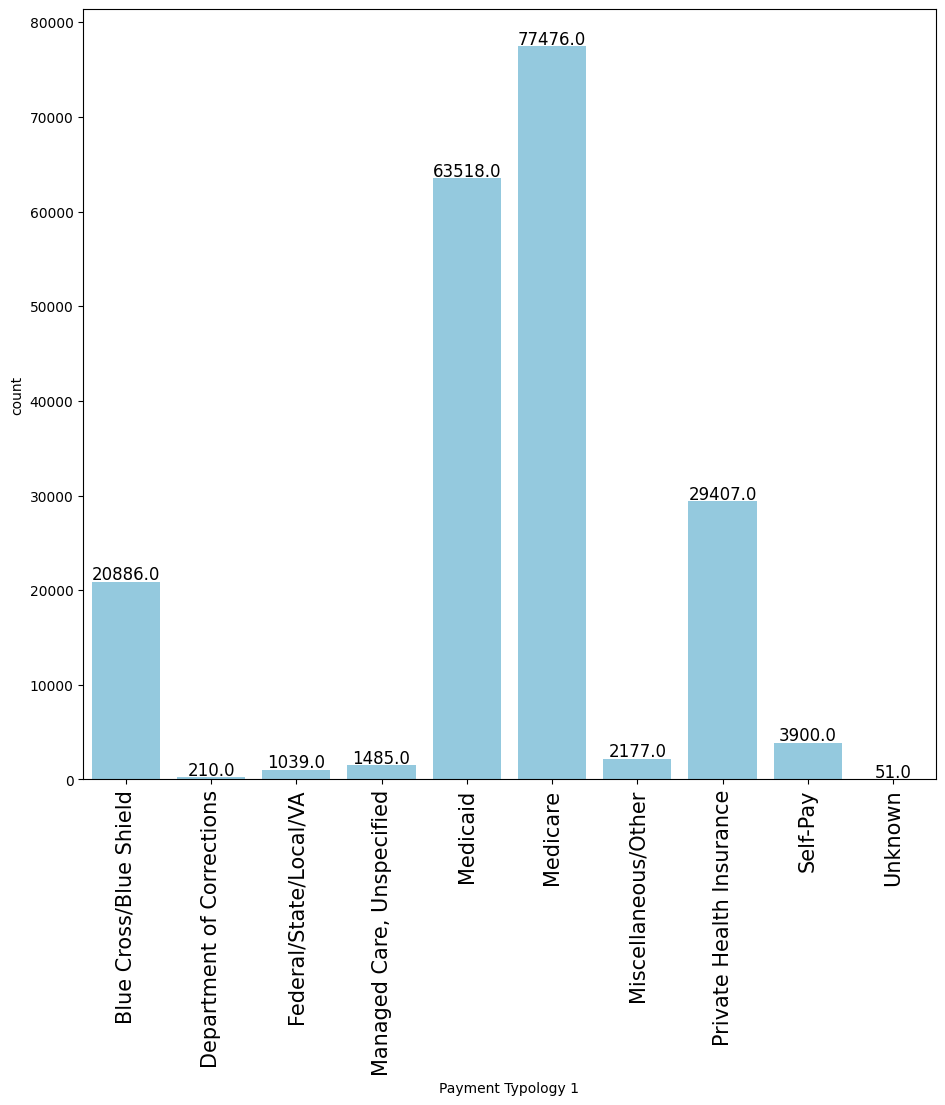

In [ ]:
labeled_barplot(df1, 'Payment Typology 1', 'SkyBlue')

In [ ]:
# distribution_plot_wrt_target(df1, 'Age Group', 'Length of Stay')

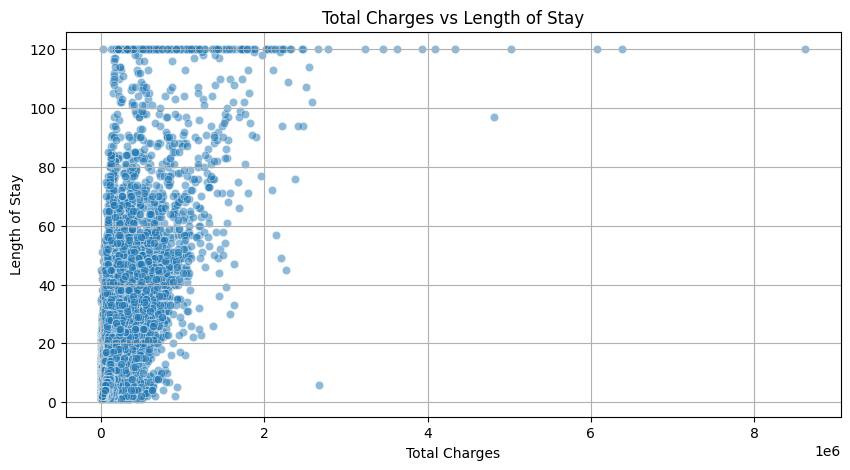

In [ ]:
# Relationship visualization with Length of Stay
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Total Charges', y='Length of Stay', data=df1, alpha=0.5)
plt.title('Total Charges vs Length of Stay')
plt.grid(True)
plt.show()


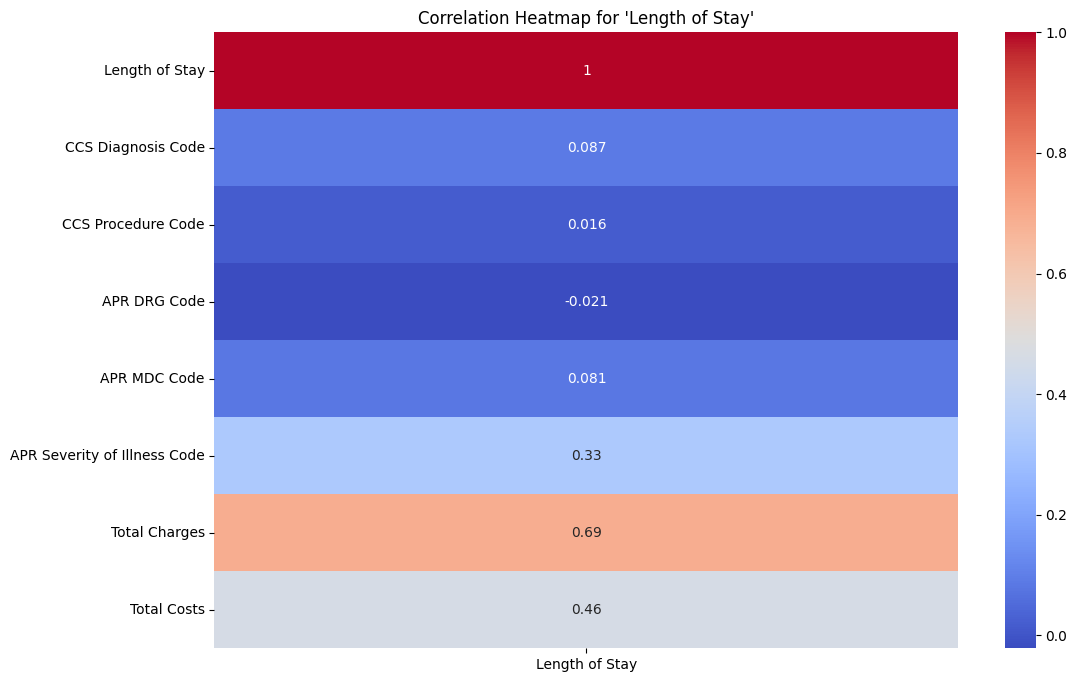

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df1.select_dtypes('number').corr()[['Length of Stay']],  # Fixed 'Numeric' to 'number'
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap for 'Length of Stay'")
plt.show()

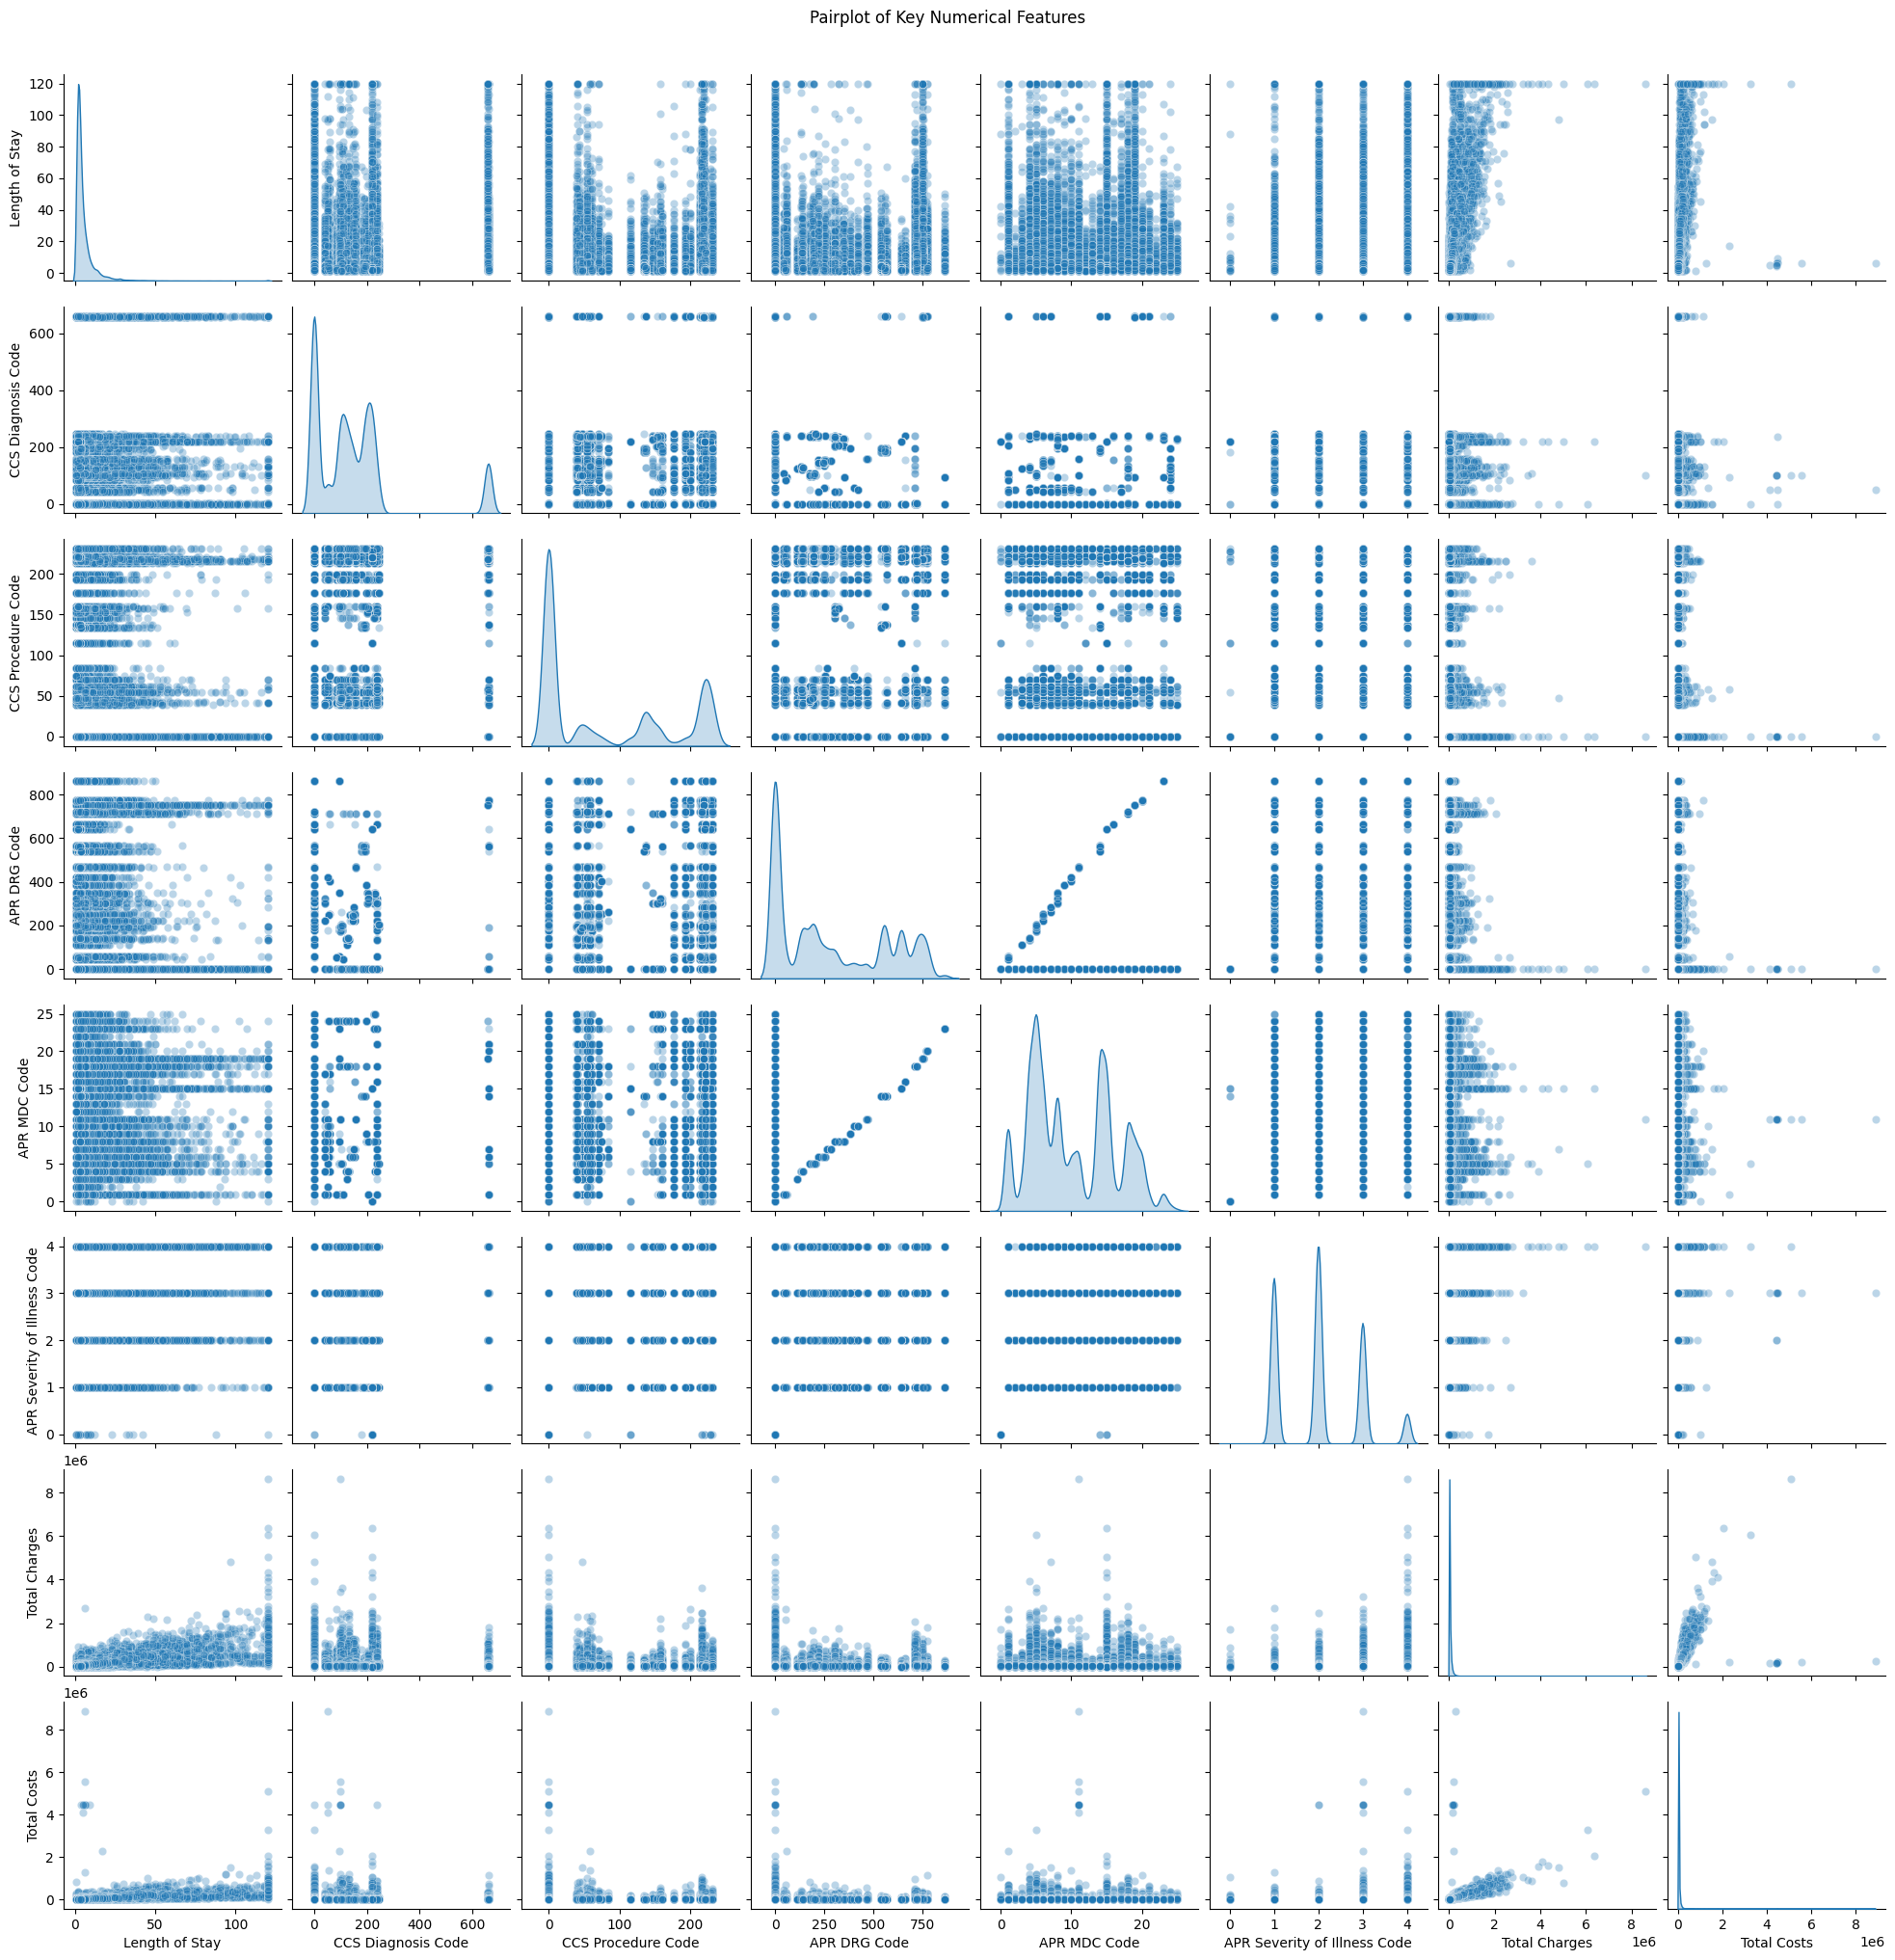

In [ ]:
sns.pairplot(df1.select_dtypes('number'), diag_kind='kde', plot_kws={'alpha':0.3})
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

In [ ]:
print(df1['Length of Stay'].max())

120


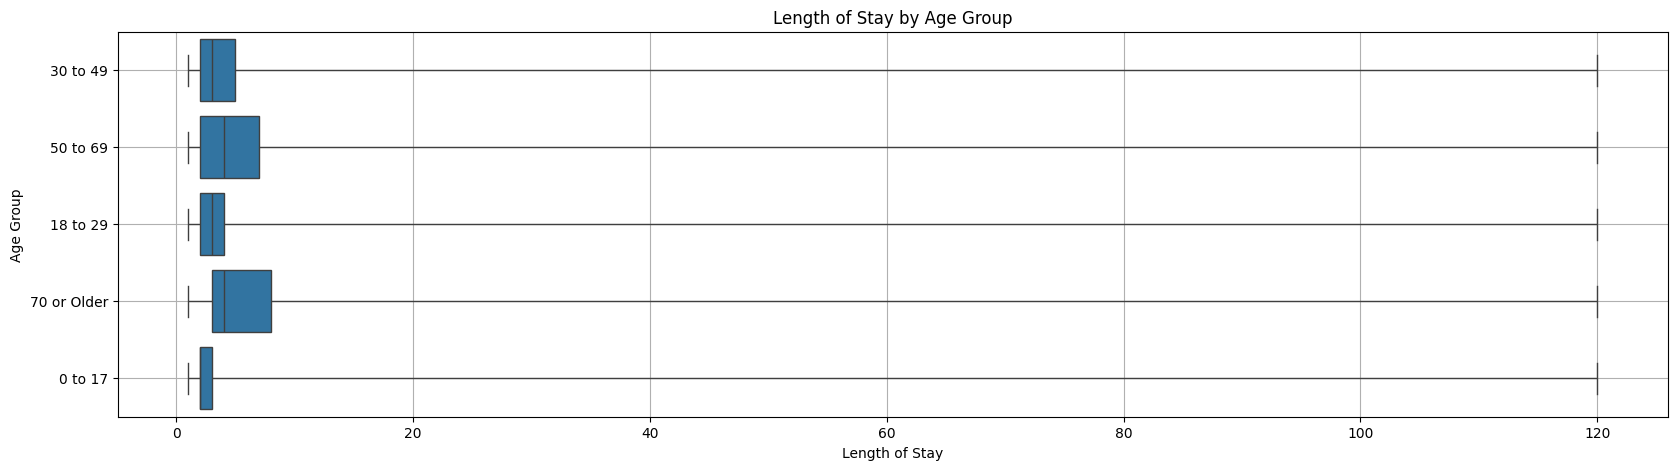

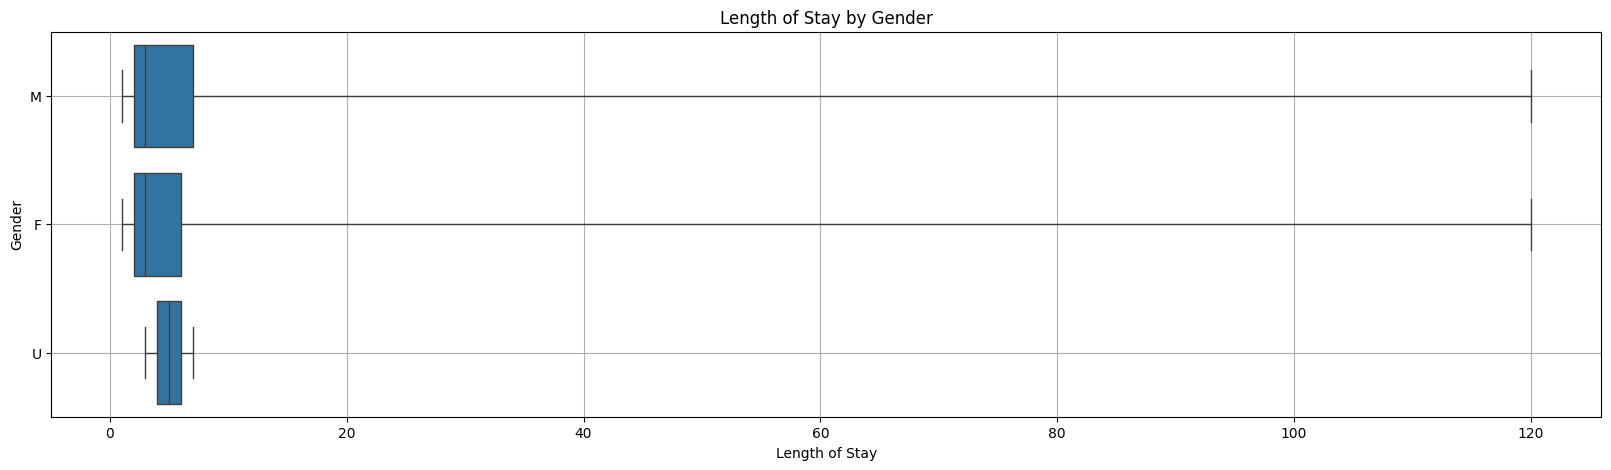

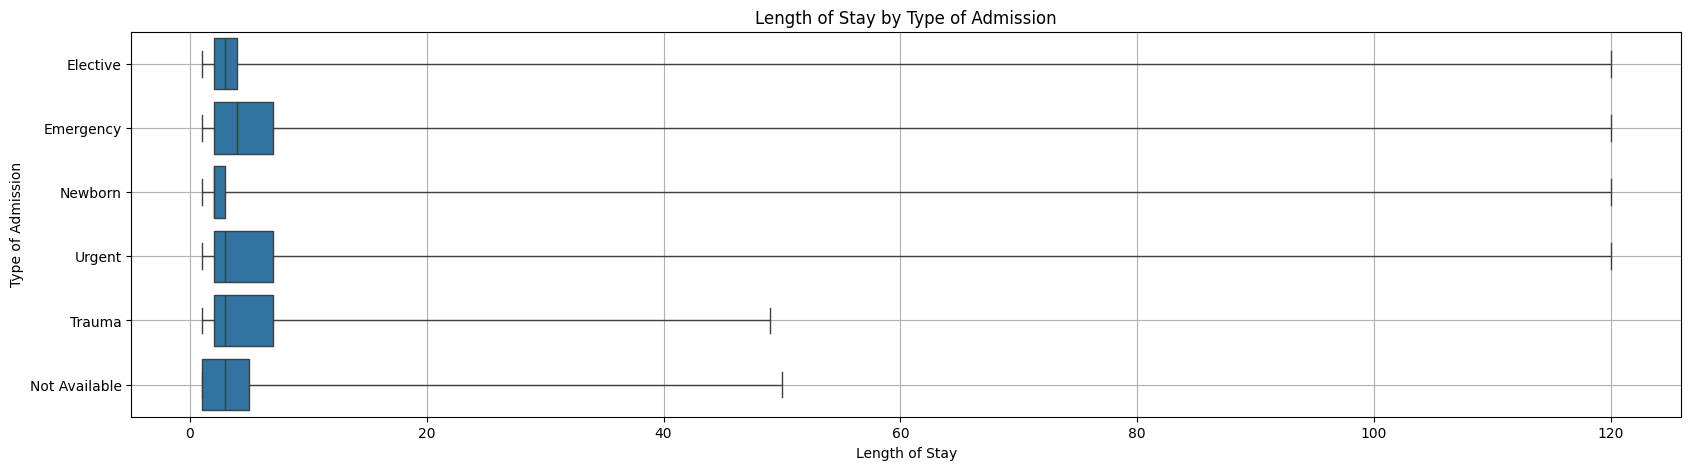

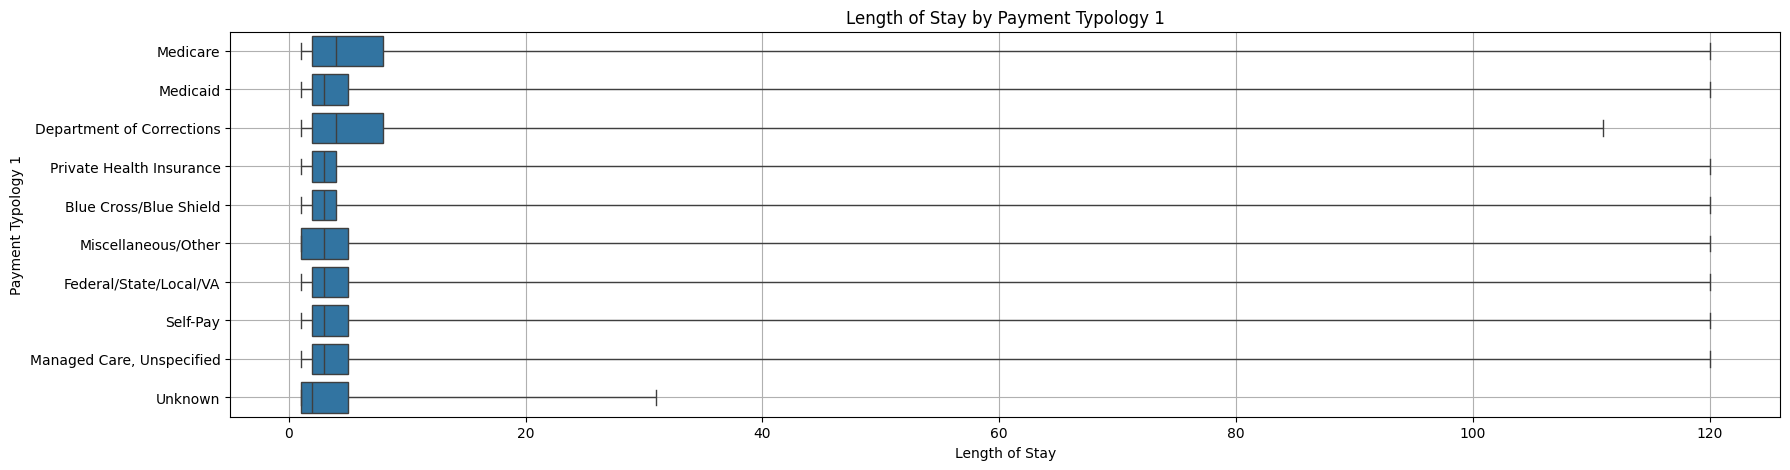

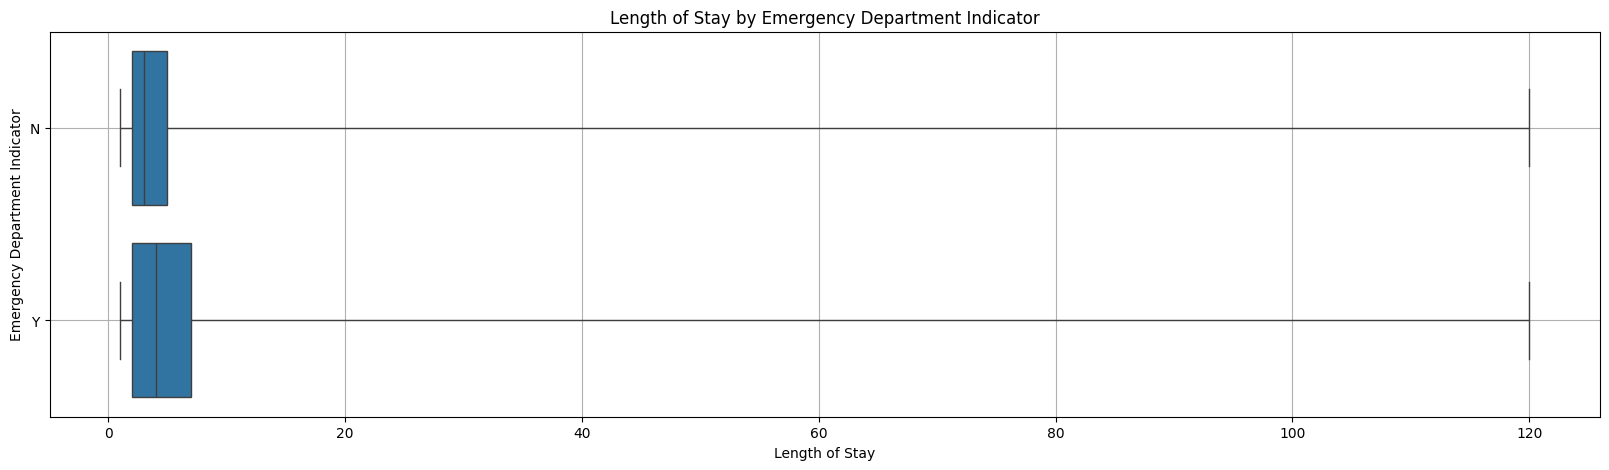

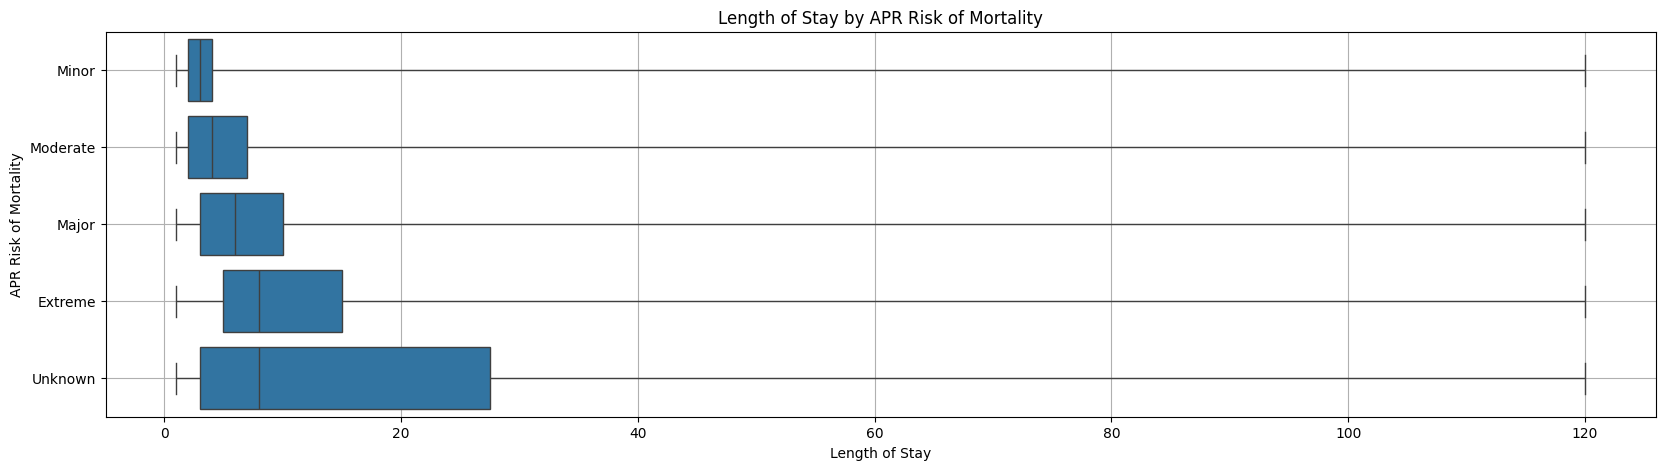

In [ ]:
categorical_cols = ['Age Group', 'Gender', 'Type of Admission',
                    'Payment Typology 1', 'Emergency Department Indicator', 'APR Risk of Mortality']

for col in categorical_cols:
    plt.figure(figsize=(20, 5))
    sns.boxplot(x='Length of Stay', y=col, data=df1, orient='h', showfliers=False, whis=[0, 100])
    plt.title(f'Length of Stay by {col}')
    plt.grid(True)
    plt.show()


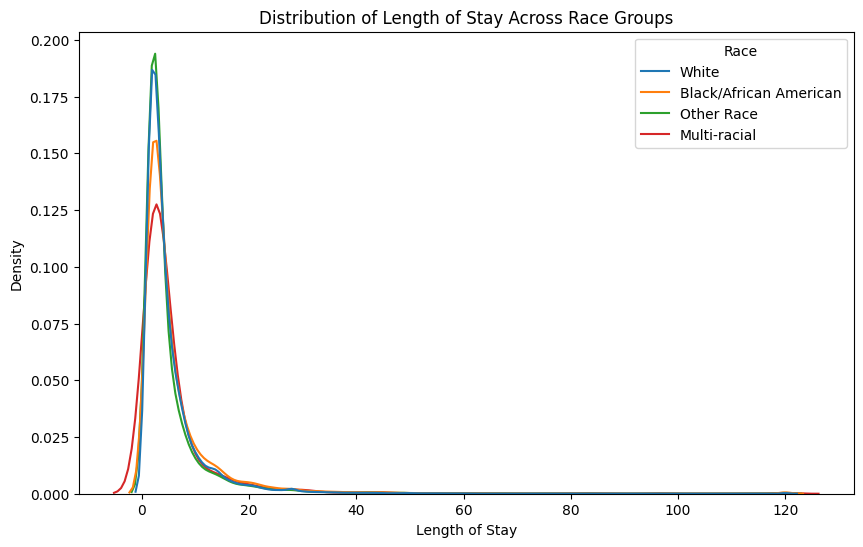

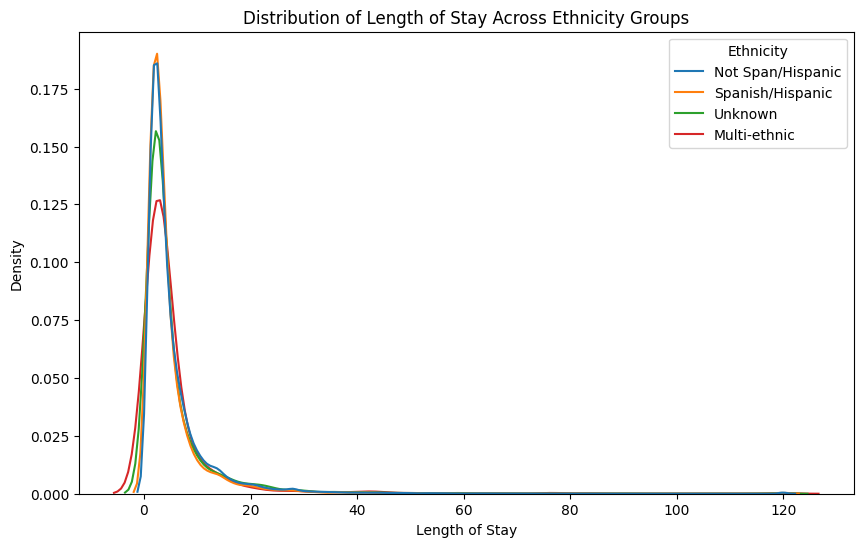

In [ ]:
# Density Plot for Race
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Length of Stay', hue='Race', common_norm=False)
plt.title("Distribution of Length of Stay Across Race Groups")
plt.show()

# Density Plot for Ethnicity
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='Length of Stay', hue='Ethnicity', common_norm=False)
plt.title("Distribution of Length of Stay Across Ethnicity Groups")
plt.show()

In [ ]:
# from scipy.stats import f_oneway

# # ANOVA test for Race
# race_groups = [df[df['Race'] == category]['Length of Stay'] for category in df['Race'].unique()]
# anova_race = f_oneway(*race_groups)

# # ANOVA test for Ethnicity
# ethnicity_groups = [df[df['Ethnicity'] == category]['Length of Stay'] for category in df['Ethnicity'].unique()]
# anova_ethnicity = f_oneway(*ethnicity_groups)

# print(f"ANOVA p-value for Race: {anova_race.pvalue}")
# print(f"ANOVA p-value for Ethnicity: {anova_ethnicity.pvalue}")

In [ ]:
categorical_features = ['Hospital County', 'Age Group', 'Gender', 'Race',
                        'Ethnicity', 'Type of Admission', 'Patient Disposition', 'Payment Typology 1',
                        'Emergency Department Indicator', 'APR Risk of Mortality']

df_encoded = df1.copy()
for col in categorical_features:
    df_encoded[col] = LabelEncoder().fit_transform(df1[col])  # Convert to numeric

chi_scores, p_values = chi2(df_encoded[categorical_features], df_encoded['Length of Stay'])
selected_features = [categorical_features[i] for i in range(len(p_values)) if p_values[i] < 0.05]

print(f"Selected categorical features: {selected_features}")

Selected categorical features: ['Hospital County', 'Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition', 'Payment Typology 1', 'Emergency Department Indicator', 'APR Risk of Mortality']


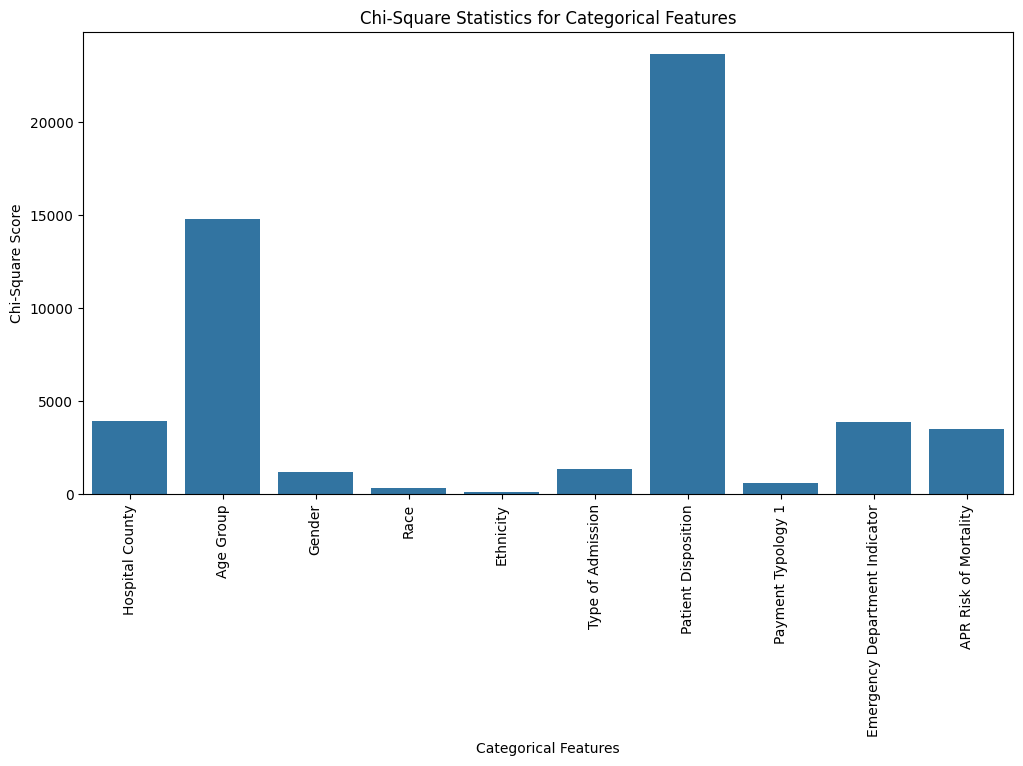

In [ ]:
# Plotting the Chi-square scores for each feature
plt.figure(figsize=(12, 6))
sns.barplot(x=categorical_features, y=chi_scores)
plt.title('Chi-Square Statistics for Categorical Features')
plt.xlabel('Categorical Features')
plt.ylabel('Chi-Square Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df1.drop(columns='Ethnicity', inplace=True)

In [ ]:
# Capping extreme outliers (99th percentile)
for col in ['Total Charges', 'Total Costs']:
    upper_limit = df1[col].quantile(0.99)
    df1[col] = np.where(df1[col] > upper_limit, upper_limit, df1[col])

# Log transformation (to handle skewness)
df1['Total Charges_log'] = np.log1p(df1['Total Charges'])
df1['Total Costs_log'] = np.log1p(df1['Total Costs'])
# Drop original columns after encoding
df1.drop(columns=['Total Charges', 'Total Costs'], inplace=True)


In [ ]:
import numpy as np


for col in ['Total Charges_log', 'Total Costs_log']:
    upper_limit = df1[col].quantile(0.99)
    df1[col] = np.where(df1[col] > upper_limit, upper_limit, df1[col])


In [ ]:
print(df1.columns)


Index(['Hospital County', 'Age Group', 'Gender', 'Race', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'CCS Diagnosis Code',
       'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',
       'APR Severity of Illness Code', 'APR Risk of Mortality',
       'Payment Typology 1', 'Emergency Department Indicator',
       'Total Charges_log', 'Total Costs_log'],
      dtype='object')


In [ ]:
# Target Encoding (Mean Encoding) for categorical variables
column = 'APR Severity of Illness Code'
target = 'Length of Stay'
means = df1.groupby(column)[target].mean()
df1['APR Severity of Illness Code' + "_target"] = df[column].map(means)

# Drop original columns after encoding
df1.drop(columns=columns_to_group, inplace=True)


In [ ]:
# Frequency Encoding for selected columns
columns_to_group = ['CCS Diagnosis Code', 'CCS Procedure Code', 'APR DRG Code', 'APR MDC Code',]
for col in columns_to_group:
    freq_encoding = df[col].value_counts(normalize=True).to_dict()
    df[col + "_freq"] = df[col].map(freq_encoding)

# Droping original columns
df.drop(columns=columns_to_group, inplace=True)

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = ['Hospital County', 'Age Group', 'Gender', 'Race', 'Type of Admission', 'Patient Disposition',
                    'Payment Typology 1', 'Emergency Department Indicator', 'APR Risk of Mortality']

for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])

In [ ]:
df1.sample(10)

,Hospital County,Age Group,Gender,Race,Length of Stay,Type of Admission,Patient Disposition,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator,Total Charges_log,Total Costs_log,APR Severity of Illness Code_target
186009,33,3,1,3,2,5,7,1,4,0,7,0,10.076605,9.261416,14.960003
122328,23,3,1,3,39,1,7,19,2,2,5,1,10.920991,10.436919,4.996778
117378,11,4,0,3,14,1,18,8,2,3,5,1,10.762289,10.085411,4.996778
131403,45,0,1,2,3,2,7,15,1,2,4,0,8.853940,7.769074,3.106286
133441,2,3,0,2,2,0,18,8,1,2,5,0,11.268428,10.157019,3.106286
83544,22,4,0,3,2,1,7,5,3,1,5,1,10.410654,9.124666,7.689868
86934,44,4,0,3,3,1,18,8,2,2,5,1,9.927936,8.311126,4.996778
127542,28,4,1,3,3,5,18,4,4,1,5,1,9.392704,8.652131,14.960003
145831,22,0,0,2,9,1,7,19,1,2,4,0,9.507087,9.068233,3.106286
24591,22,0,1,3,2,2,7,15,1,2,0,0,9.746831,8.793650,3.106286


In [ ]:
# Definng the features (X) and target (y)
X = df1.drop(columns=['Length of Stay'])  # All columns except target
y = df1['Length of Stay']  # This id the Target variable


In [ ]:
# Spliting into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Printing shapes of resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (160119, 14)
X_test shape: (40030, 14)
y_train shape: (160119,)
y_test shape: (40030,)
